Target fault: { gateType: U, qubits: 0, params: [3.141592653589793, 3.141592653589793, 3.141592653589793] }
Length: 8	Repetition: 11	Cost: 88
Chi-Value boundary: 53.32054286530503
Effect Size: 2.2621513212401103
Overkill: 0.0	Test Escape: 0.0

0.1


'0.1'

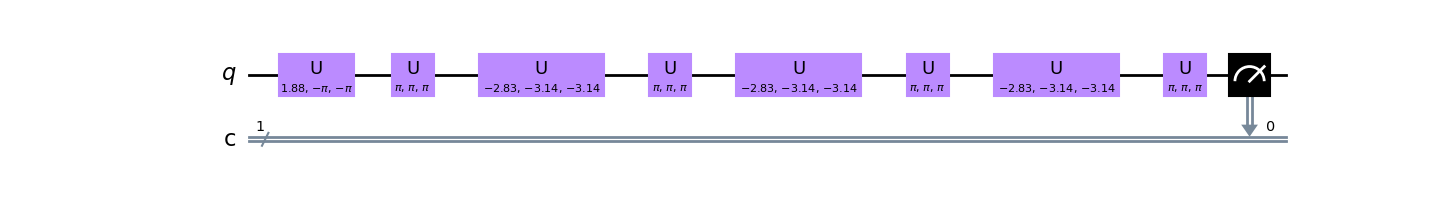

In [62]:

import numpy as np
import qiskit.circuit.library as qGate

from qatg import QATG
from qatg import QATGFault

class myUFault(QATGFault):
	def __init__(self, params):
		super(myUFault, self).__init__(qGate.UGate, 0, f"gateType: U, qubits: 0, params: {params}")
		self.params = params
	def createOriginalGate(self):
		return qGate.UGate(*self.params)
	def createFaultyGate(self, faultfreeGate):
		return qGate.UGate(faultfreeGate.params[0] - 0.1*np.pi, faultfreeGate.params[1], faultfreeGate.params[2]) # bias fault on theta

generator = QATG(circuitSize = 1, basisGateSet = [qGate.UGate], circuitInitializedStates = {1: [1, 0]}, minRequiredEffectSize = 2)
configurationList = generator.createTestConfiguration([myUFault([np.pi, np.pi, np.pi])])

for configuration in configurationList:
    print(configuration)
    configuration.circuit.draw('mpl')
input()

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%matplotlib ipympl
# pip install ipympl

import numpy as np
import qiskit.circuit.library as qGate
from qiskit.extensions import UnitaryGate

from qatg import QATG
from qatg import QATGFault

class myUFault(QATGFault):
	def __init__(self, params):
		super(myUFault, self).__init__(qGate.UGate, 0, f"gateType: U, qubits: 0, params: {params}")
		self.params = params
	def createOriginalGate(self):
		return qGate.UGate(*self.params)
	def createFaultyGate(self, faultfreeGate):
		return qGate.UGate(faultfreeGate.params[0] - 0.1*np.pi, faultfreeGate.params[1], faultfreeGate.params[2])
    
class myCNOTFault(QATGFault):
	def __init__(self):
		super(myCNOTFault, self).__init__(qGate.CXGate, [0, 1], f"gateType: CX, qubits: 0-1")
	def createOriginalGate(self):
		return qGate.CXGate()
	def createFaultyGate(self, faultfreeGate):
		if not isinstance(faultfreeGate, qGate.CXGate):
			raise TypeError("what is this faultfreeGate")
		matrix = qGate.CXGate().to_matrix()
		UF = qGate.UGate(0.05*np.pi, 0.05*np.pi, 0.05*np.pi)
		matrix = np.matmul(np.kron(np.eye(2), UF), matrix)
		matrix = np.matmul(matrix, np.kron(UF, np.eye(2)))
		return UnitaryGate(matrix)

In [66]:
class myRXFault(QATGFault):
	def __init__(self, param):
		super(myRXFault, self).__init__(qGate.RXGate, 0, f"gateType: RX, qubits: 0, param: {param}")
		self.param = param
	def createOriginalGate(self):
		return qGate.RXGate(self.param)
	def createFaultyGate(self, faultfreeGate):
		return qGate.RXGate(faultfreeGate.params[0] - 0.1*np.pi) # bias fault
	
class myRZFault(QATGFault):
	def __init__(self, param):
		super(myRZFault, self).__init__(qGate.RZGate, 0, f"gateType: RZ, qubits: 0, param: {param}")
		self.param = param
	def createOriginalGate(self):
		return qGate.RZGate(self.param)
	def createFaultyGate(self, faultfreeGate):
		return qGate.RZGate(faultfreeGate.params[0] - 0.1*np.pi) # bias fault

GS Parameter Score: 0.19098300562505274
GD Parameter Score: 0.19098300562191783
GD Step: 0
Current ParamterSet: [[1.8849517724935656, -3.1415945634200315, -3.141592653589793]]
Current effect size: 0.3791639787513044

GS Parameter Score: 0.6250015513436586
GD Parameter Score: 0.6909830041832262
GD Step: 27
Current ParamterSet: [[-2.8274409705767454, -3.1416919002604526, -3.141682239461847]]
Current effect size: 0.7968863722870106

GS Parameter Score: 1.184025766478124
GD Parameter Score: 1.3090169911148877
GD Step: 12
Current ParamterSet: [[-2.8274495440471235, -3.1416441176836685, -3.1416560289178896]]
Current effect size: 1.3294595246531753

GS Parameter Score: 1.6363005439085139
GD Parameter Score: 1.8090169897115338
GD Step: 7
Current ParamterSet: [[-2.8274430778431068, -3.141619466924457, -3.141617508328949]]
Current effect size: 2.2621513212401103

Target fault: { gateType: U, qubits: 0, params: [3.141592653589793, 3.141592653589793, 3.141592653589793] }
Length: 8	Repetition: 11	C

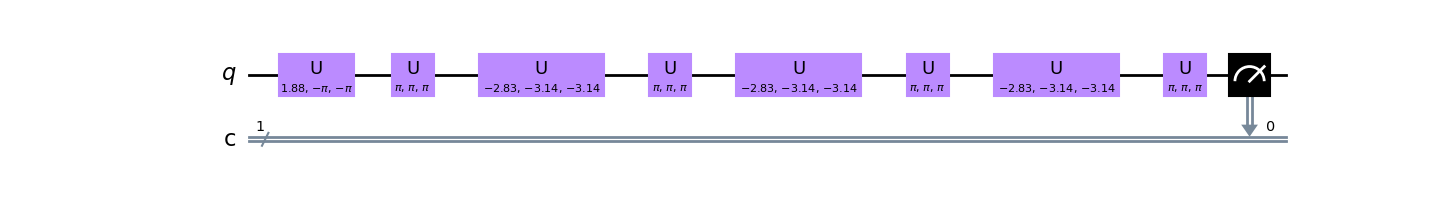

In [93]:
generator = QATG(circuitSize = 1, basisGateSet = [qGate.UGate], circuitInitializedStates = {1: [1, 0]}, minRequiredEffectSize = 2, verbose = True)
configurationList = generator.createTestConfiguration([myUFault([np.pi, np.pi, np.pi])])
for configuration in configurationList:
    print(configuration)
    configuration.circuit.draw('mpl')

GS Parameter Score: 0.09607039765619946
GD Parameter Score: 0.10173107904317229
GD Step: 999
Current ParamterSet: [[2.214289237472407, -2.1244171135065533, -1.25663706142265]]
Current effect size: 1.6155584327810946

GS Parameter Score: 1.0078400702666657
GD Parameter Score: 1.0176486351238743
GD Step: 246
Current ParamterSet: [[-2.6120541702238107, 3.1872762672235666, -0.04937253592807167]]
Current effect size: 1.059589967205958

GS Parameter Score: 1.451306873093094
GD Parameter Score: 1.5159923660151788
GD Step: 137
Current ParamterSet: [[2.953000328905304, 1.7976308707363948, -0.46845040173768027]]
Current effect size: 2.830988921255803

GS Parameter Score: 0.04774575140626329
GD Parameter Score: 0.048943483704770516
GD Step: 408
Current ParamterSet: [[1.727874713150752, 2.513274122873962, 1.762479051592436e-12]]
Current effect size: 1.3032612967734776

GS Parameter Score: 0.42243070663159754
GD Parameter Score: 0.4451386839569016
GD Step: 88
Current ParamterSet: [[2.09882355906024

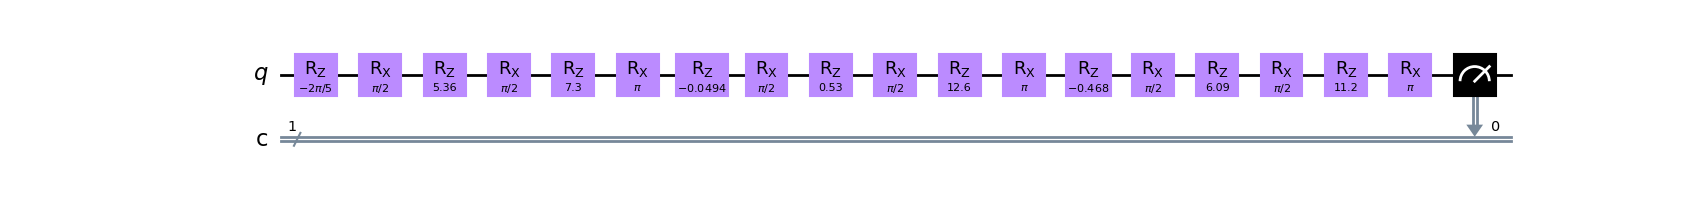

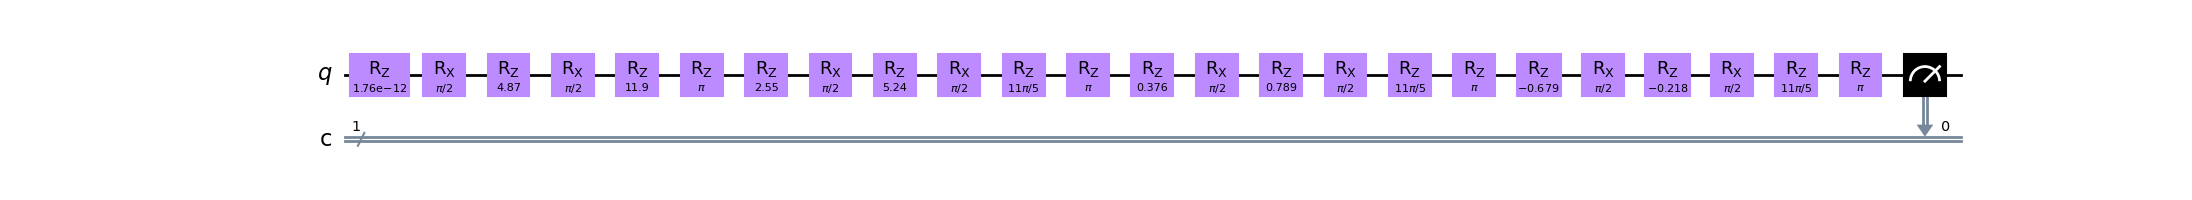

In [94]:
generator = QATG(circuitSize = 1, basisGateSet = [qGate.RXGate, qGate.RZGate], circuitInitializedStates = {1: [1, 0]}, minRequiredEffectSize = 2, verbose = True)
configurationList = generator.createTestConfiguration([myRXFault(np.pi), myRZFault(np.pi)])
for configuration in configurationList:
    print(configuration)
    configuration.circuit.draw('mpl')

In [69]:
generator = QATG(circuitSize = 2, basisGateSet = [qGate.UGate], circuitInitializedStates = {2: [1, 0, 0, 0]}, minRequiredEffectSize = 3, verbose = True)
configurationList = generator.createTestConfiguration([myCNOTFault()])

GS Parameter Score: 0.01196141658614312
GD Parameter Score: 0.012673958806581837
GD Step: 999
Current ParamterSet: [[2.045384376202812, 3.2100498175488577, -3.141592653589793], [-1.4199111741563744, -3.2574337873868635, -3.141592653589793]]
Current effect size: 0.5881340747879396

GS Parameter Score: 0.09903041403756813
GD Parameter Score: 0.11494705713579598
GD Step: 999
Current ParamterSet: [[2.31172933526764, 1.7362749512429283, 1.2654218613286365], [-1.4681183047187412, 1.2302492516103607, -1.0346366766093855]]
Current effect size: 0.9345878876453638

GS Parameter Score: 0.22350931872453558
GD Parameter Score: 0.23393808955593015
GD Step: 999
Current ParamterSet: [[-0.47062287307994577, -2.0279239250173284, 1.4920293048042161], [0.17081597739959653, -3.7314609392625497, -2.7881586415020876]]
Current effect size: 1.3106788242954355

GS Parameter Score: 0.4477268215208382
GD Parameter Score: 0.470661979087619
GD Step: 999
Current ParamterSet: [[2.515082354007104, 1.404436733752041, 1

Target fault: { gateType: CX, qubits: 0-1 }
Length: 34	Repetition: 18	Cost: 612
Chi-Value boundary: 53.459484229433265
Effect Size: 3.342506339665388
Overkill: 0.0006	Test Escape: 0.0002



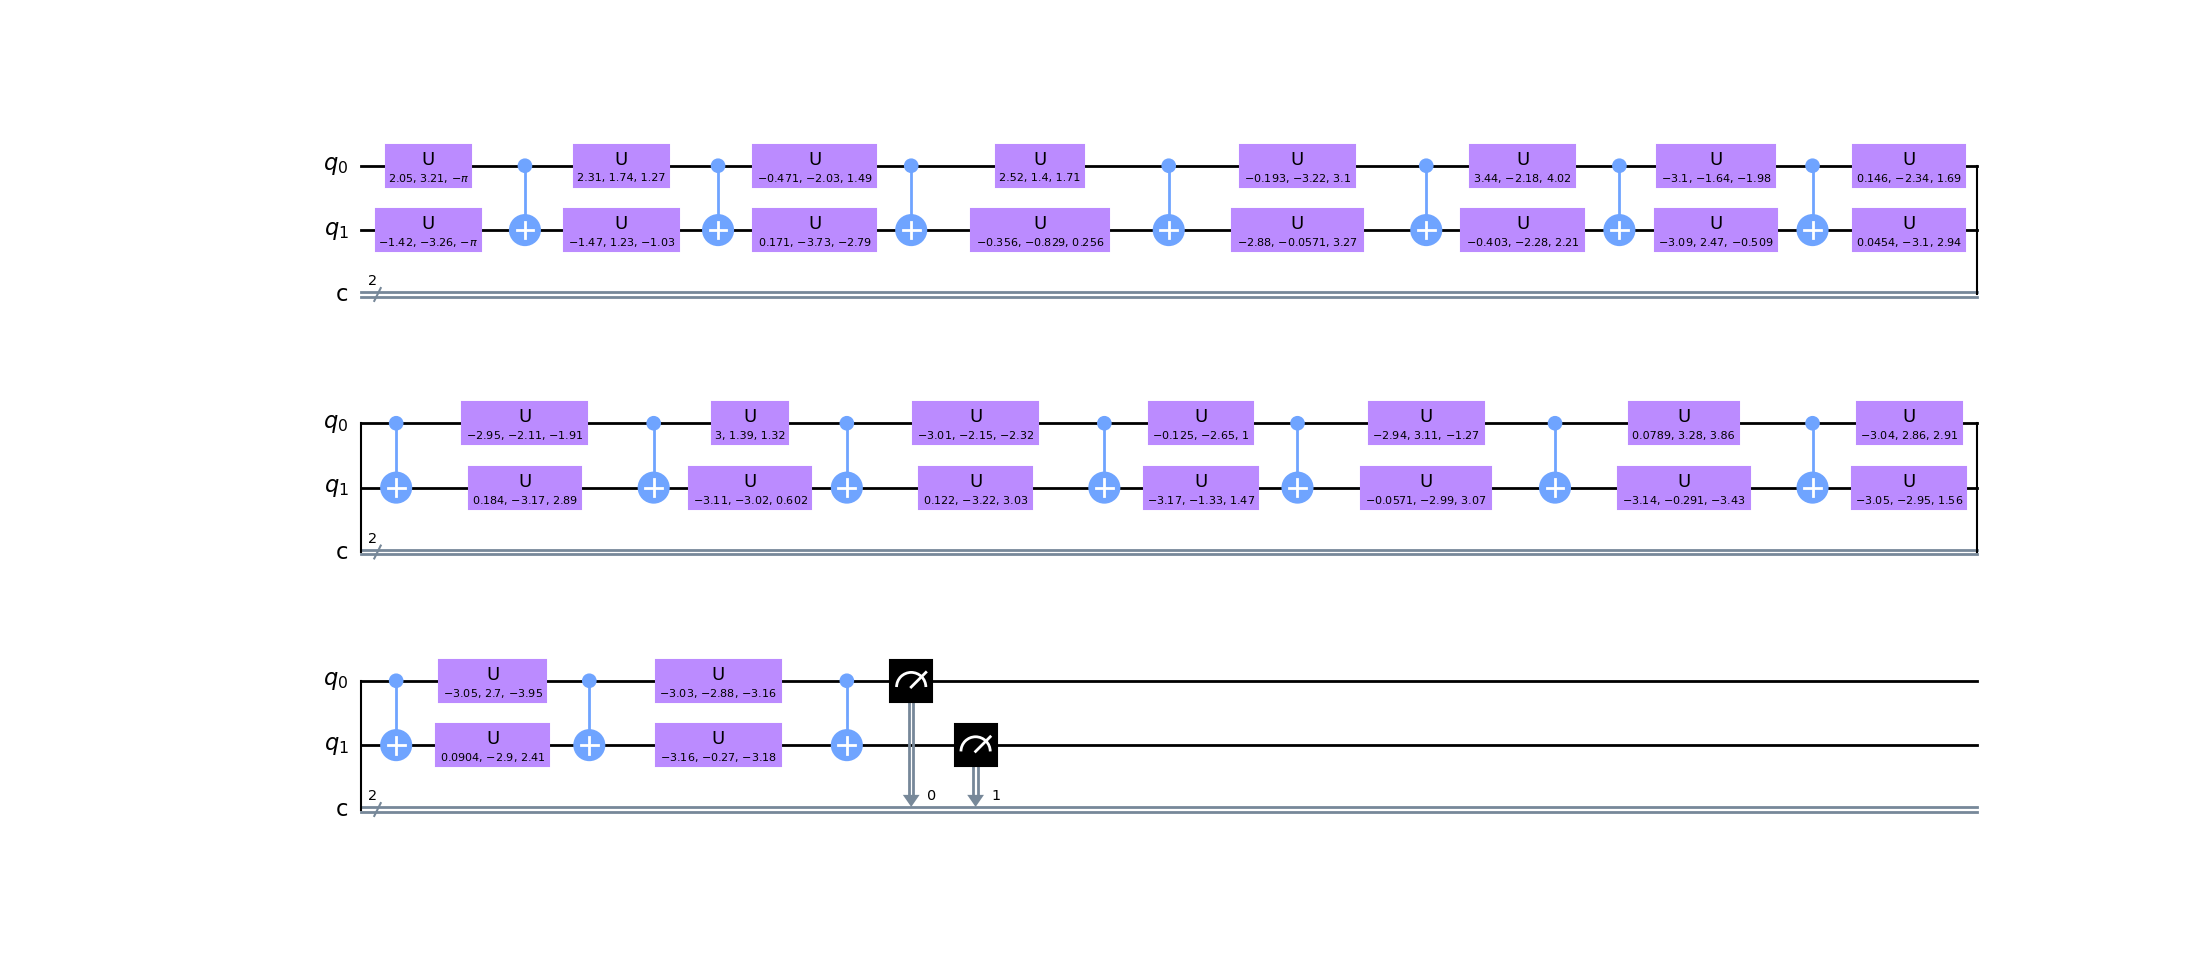

In [70]:
for configuration in configurationList:
    print(configuration)
    configuration.circuit.draw('mpl')

In [91]:
!!pip install qiskit[visualization]
!!pip install qiskit-ignis

import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
from qiskit.visualization import array_to_latex
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
def errorMitigation(self):
		meas_calibs, state_labels = complete_meas_cal(qr=self.quantumRegister, circlabel='mcal')
		for circuit in meas_calibs:
            		print('Circuit',circuit.name)
            		print(circuit)
            		print()
		aer_sim = Aer.get_backend('aer_simulator')
		t_qc = transpile(meas_calibs, aer_sim)
		qobj = assemble(t_qc, shots=10000)
		cal_results = aer_sim.run(qobj, shots=10000).result()
		
		meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
		array_to_latex(meas_fitter.cal_matrix, source=True)


Target fault: { gateType: CX, qubits: 0-1 }
Length: 34	Repetition: 18	Cost: 612
Chi-Value boundary: 53.459484229433265
Effect Size: 3.342506339665388
Overkill: 0.0006	Test Escape: 0.0002

Circuit mcalcal_00
        ░ ┌─┐   
  q_0: ─░─┤M├───
        ░ └╥┘┌─┐
  q_1: ─░──╫─┤M├
        ░  ║ └╥┘
c27_0: ════╩══╬═
              ║ 
c27_1: ═══════╩═
                

Circuit mcalcal_01
       ┌───┐ ░ ┌─┐   
  q_0: ┤ X ├─░─┤M├───
       └───┘ ░ └╥┘┌─┐
  q_1: ──────░──╫─┤M├
             ░  ║ └╥┘
c27_0: ═════════╩══╬═
                   ║ 
c27_1: ════════════╩═
                     

Circuit mcalcal_10
             ░ ┌─┐   
  q_0: ──────░─┤M├───
       ┌───┐ ░ └╥┘┌─┐
  q_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
c27_0: ═════════╩══╬═
                   ║ 
c27_1: ════════════╩═
                     

Circuit mcalcal_11
       ┌───┐ ░ ┌─┐   
  q_0: ┤ X ├─░─┤M├───
       ├───┤ ░ └╥┘┌─┐
  q_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
c27_0: ═════════╩══╬═
                   ║ 
c27_1: ════════════╩═
        

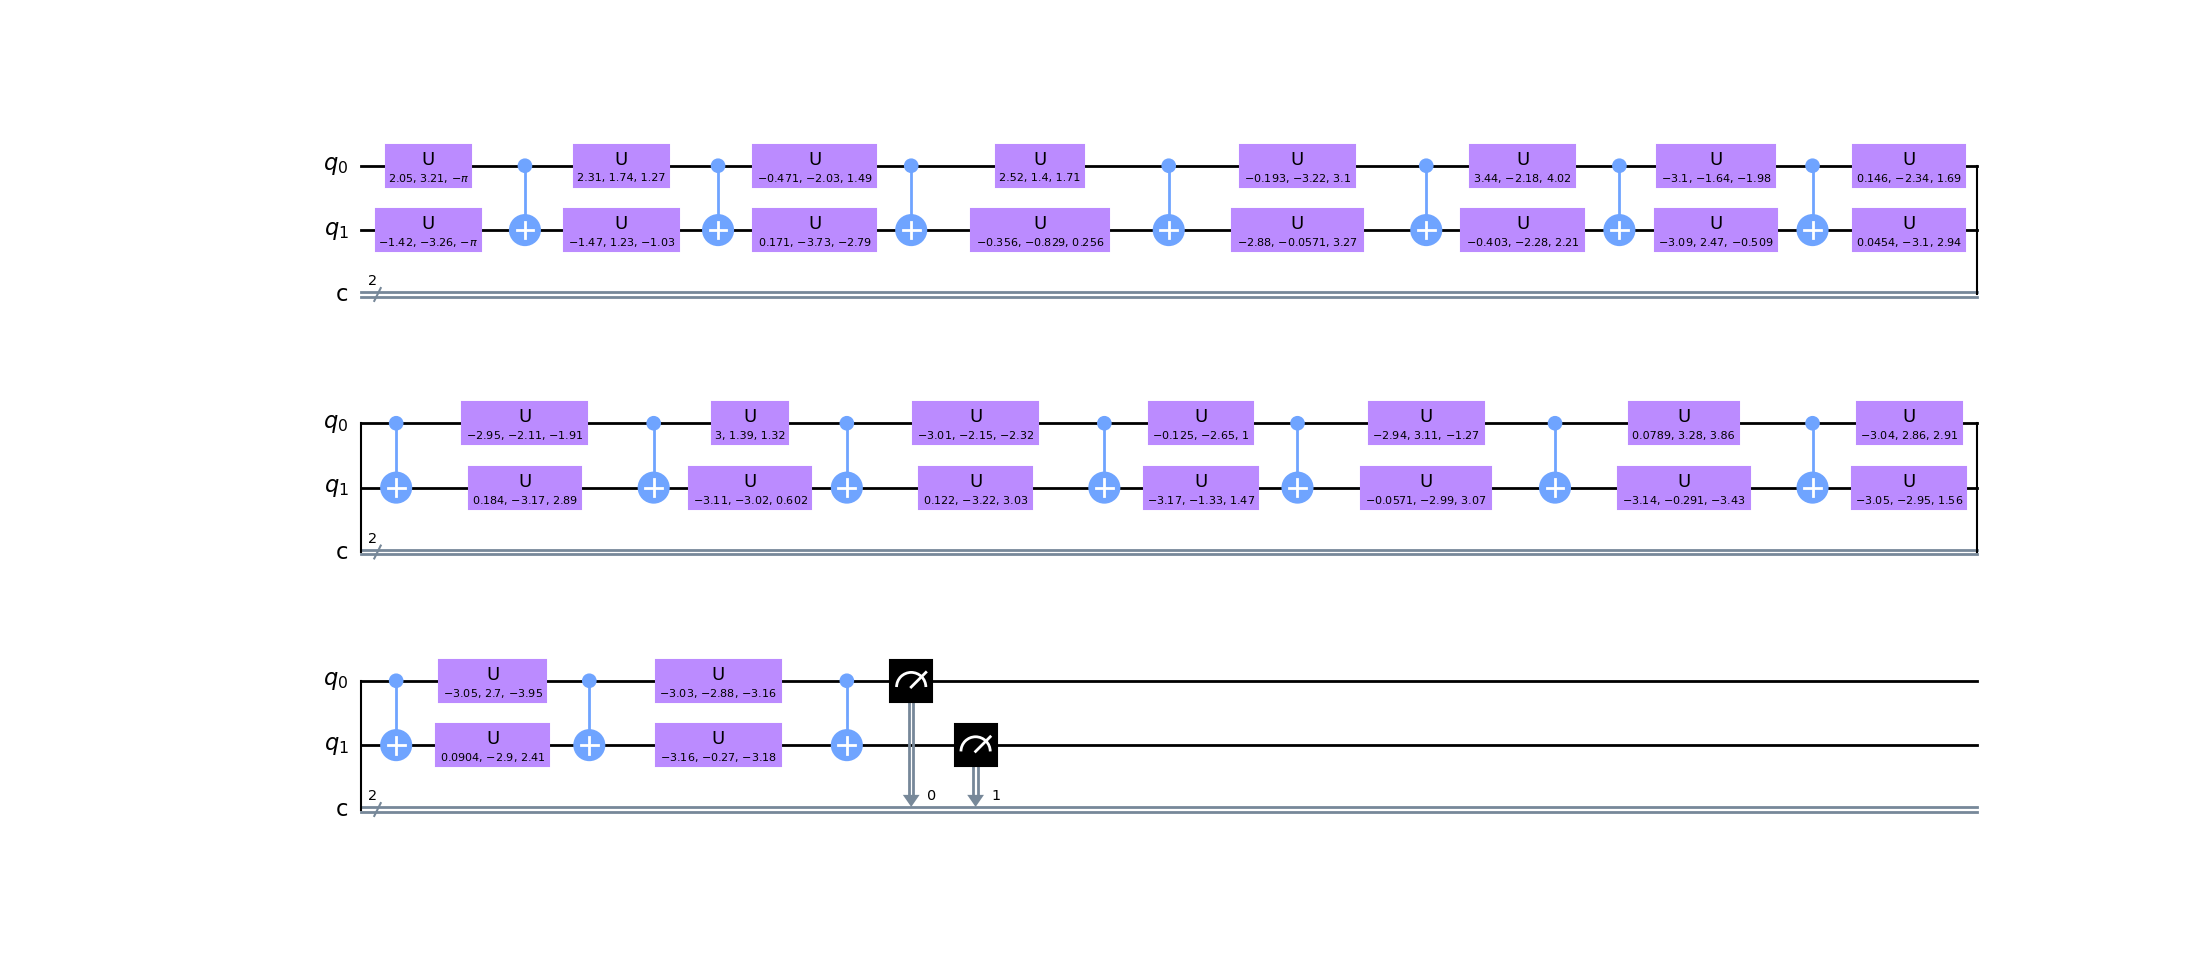

In [92]:

for configuration in configurationList:
    print(configuration)
    errorMitigation(configuration)
    #print(configuration)
    configuration.circuit.draw('mpl')